# Checking Baseline with AutoML

In [1]:
%config InlineBackend.figure_format='retina'
import logging
import warnings
from ekorpkit import eKonf

logging.basicConfig(level=logging.INFO)
warnings.filterwarnings('ignore')
print(eKonf.__version__)

0.1.32+22.g1490fd9.dirty


In [2]:
data_dir = "../data/fomc"

## Load a feature set

In [3]:
fs_cfg = eKonf.compose(config_group="dataset=feature")
fs_cfg.name = "fomc_features_small"
fs_cfg.data_dir = data_dir
fs_fomc = eKonf.instantiate(fs_cfg)

INFO:ekorpkit.datasets.base:Loaded info file: ../data/fomc/fomc_features_small/info-fomc_features_small.yaml
INFO:ekorpkit.io.file:Processing [1] files from ['../data/fomc/fomc_features_small/fomc_features_small-train.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_features_small/fomc_features_small-train.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_features_small/fomc_features_small-train.parquet
INFO:ekorpkit.info.column:Added a column [split] with value [train]
INFO:ekorpkit.io.file:Processing [1] files from ['../data/fomc/fomc_features_small/fomc_features_small-test.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_features_small/fomc_features_small-test.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_features_small/fomc_features_small-test.parquet
INFO:ekorpkit.info.column:Added a column [split] with value [test]


## Auto ML

In [4]:
model_cfg = eKonf.compose(config_group='model/automl=classification')
model_cfg.dataset = fs_cfg
model_cfg.config.time_budget = 600
model_cfg.verbose = False
model = eKonf.instantiate(model_cfg)

INFO:ekorpkit.ekonf:No method defined to call


In [4]:
model.fit()

Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 4, 'max_features': 0.6336706494056755, 'max_leaves': 7, 'criterion': 'entropy'}
Best accuracy on validation data: 0.6849
Training duration of best run: 0.1748 s


In [5]:
model.best_estimator

RandomForestClassifier(criterion='entropy', max_features=0.6336706494056755,
                       max_leaf_nodes=7, n_estimators=4, n_jobs=-1)

In [6]:
model.save()

In [5]:
model.load()

INFO:ekorpkit.models.automl.flaml:Loaded model from /workspace/projects/esgml/outputs/automl_fomc_features_small/automl_fomc_features_small.mdl


In [6]:
model.show_results()

Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 4, 'max_features': 0.6336706494056755, 'max_leaves': 7, 'criterion': 'entropy'}
Best accuracy on validation data: 0.6849
Training duration of best run: 0.1748 s


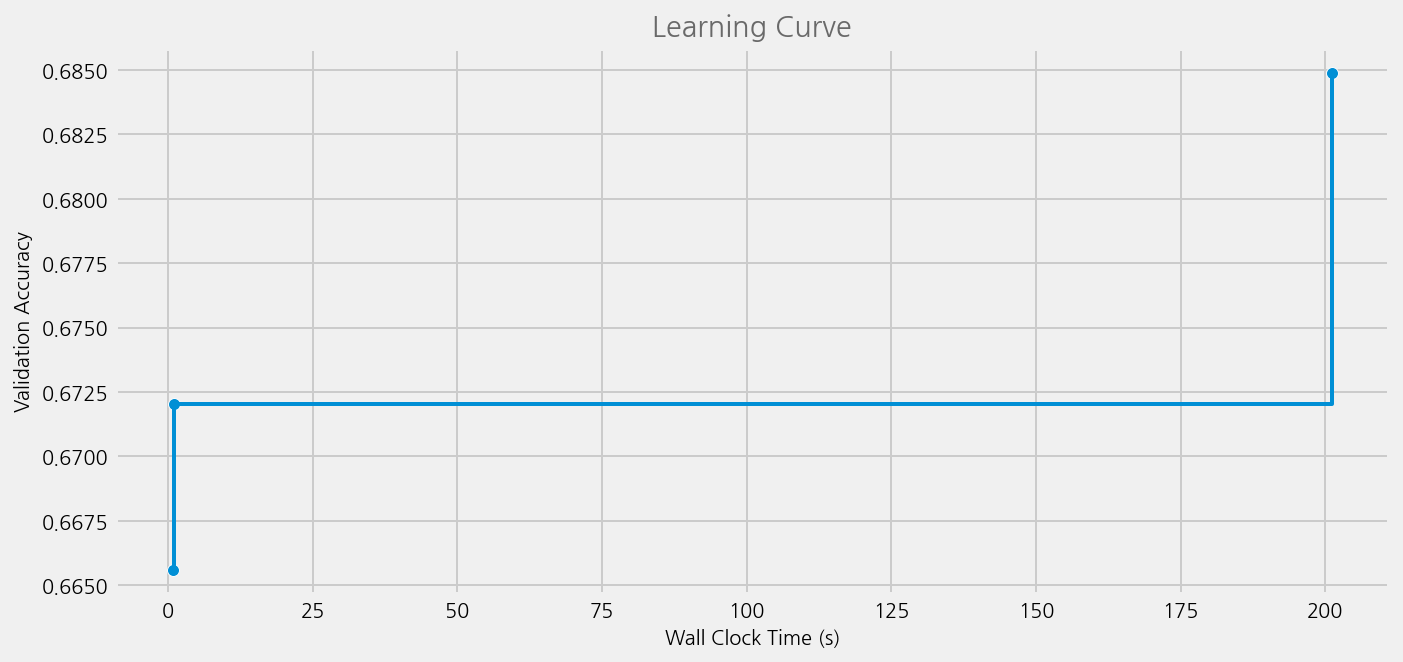

In [7]:
model.plot_learning_curve()

r2 = -0.37118039398169733
mse = 0.8173076923076923
mae = 0.49038461538461536
Accuracy:  0.6730769230769231
Precison:  0.5528554778554778
Recall:  0.6730769230769231
F1 Score:  0.5743400621118012
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

         Cut       0.60      0.17      0.26        18
        Hike       0.00      0.00      0.00        17
        Hold       0.68      0.97      0.80        69

    accuracy                           0.67       104
   macro avg       0.43      0.38      0.35       104
weighted avg       0.55      0.67      0.57       104



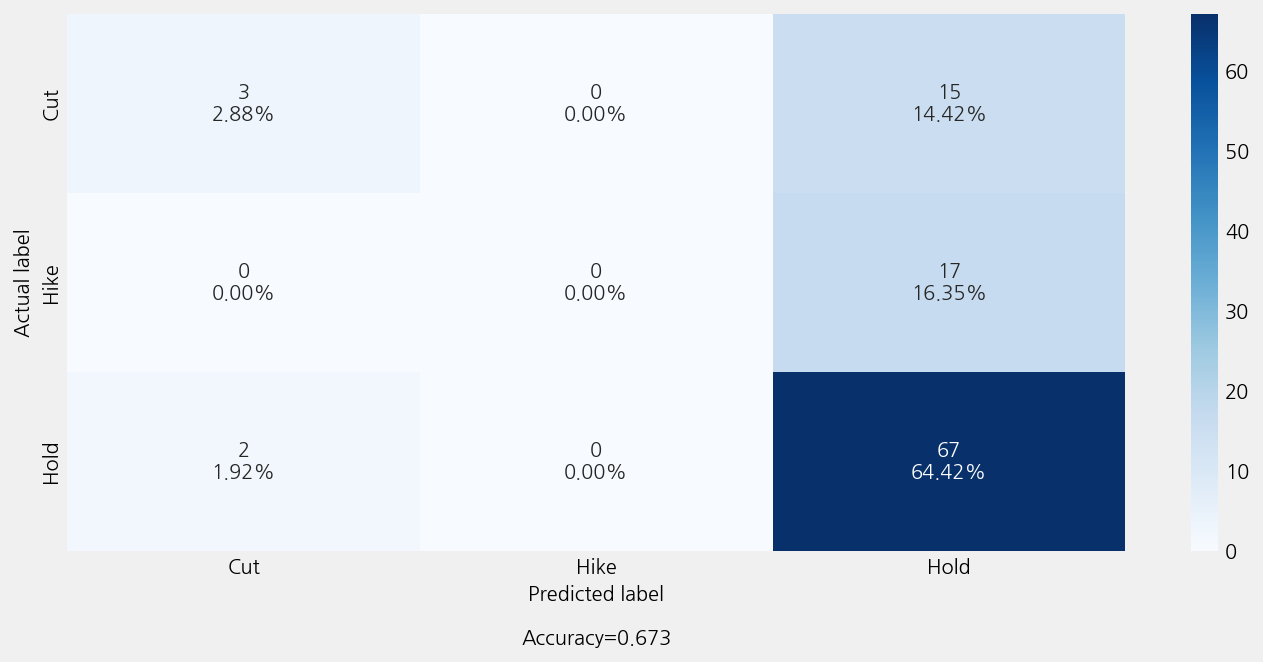

In [8]:
model.eval()

INFO:ekorpkit.visualize.plot:Plotting barplot with {'x': 'importances', 'y': 'columns', 'hue': None}
INFO:ekorpkit.visualize.base:Saved figure to ./figs/fig_BarPlot.png


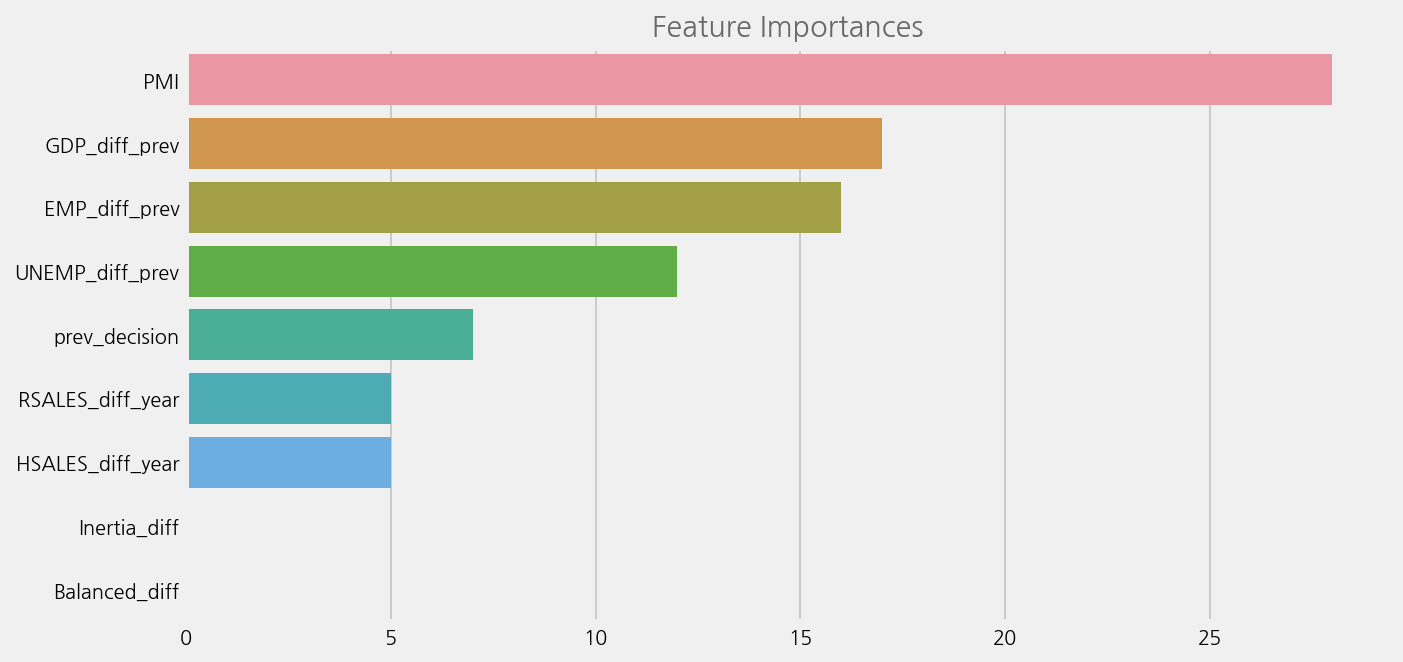

In [9]:
model.plot_feature_importance()

In [8]:
model.get_feature_importance()

,columns,importances
2,PMI,28
1,GDP_diff_prev,17
3,EMP_diff_prev,16
5,UNEMP_diff_prev,12
0,prev_decision,7
4,RSALES_diff_year,5
6,HSALES_diff_year,5
7,Inertia_diff,0
8,Balanced_diff,0


INFO:ekorpkit.visualize.plot:Plotting barplot with {'x': 'columns', 'y': 'importances', 'hue': None}
INFO:ekorpkit.visualize.base:Saved figure to ./figs/fig_BarPlot.png


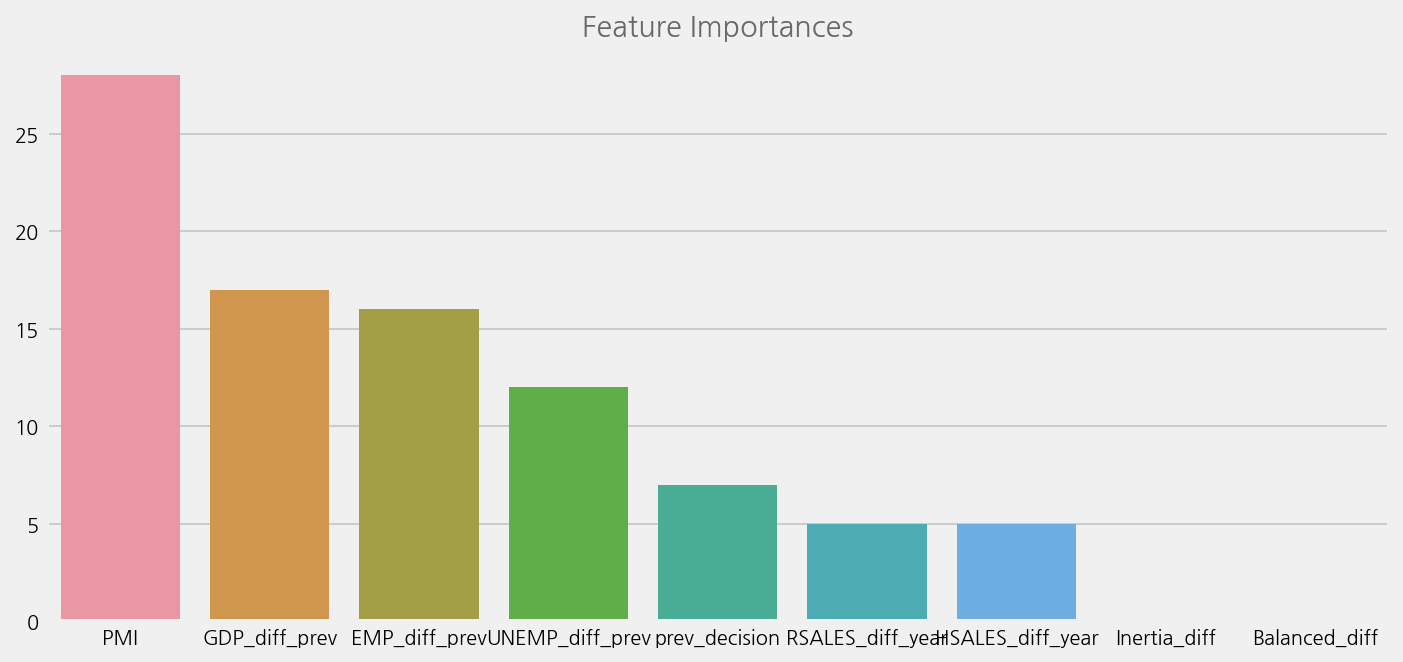

In [7]:
data = model.get_feature_importance()
cfg = eKonf.compose("visualize/plot=barplot")
cfg.plot.x = "columns"
cfg.plot.y = "importances"
cfg.figure.figsize = (10, 5)
cfg.figure.fontsize = 10
cfg.ax.title = "Feature Importances"
eKonf.instantiate(cfg, data=data)


INFO:ekorpkit.io.file:Concatenating 2 dataframes
INFO:ekorpkit.visualize.plot:Plotting lineplot with {'x': 'date', 'y': 'PMI', 'linewidth': 2, 'palette': None, 'hue': None, 'size': None, 'style': None, 'hue_order': None, 'hue_norm': None, 'sizes': None, 'size_order': None, 'size_norm': None, 'dashes': True, 'markers': None, 'style_order': None, 'units': None, 'estimator': 'mean', 'ci': 95, 'n_boot': 1000, 'seed': None, 'sort': True, 'err_style': 'band', 'err_kws': None, 'legend': 'auto', 'drawstyle': None}
INFO:ekorpkit.visualize.base:Saved figure to ./figs/fig_LinePlot.png


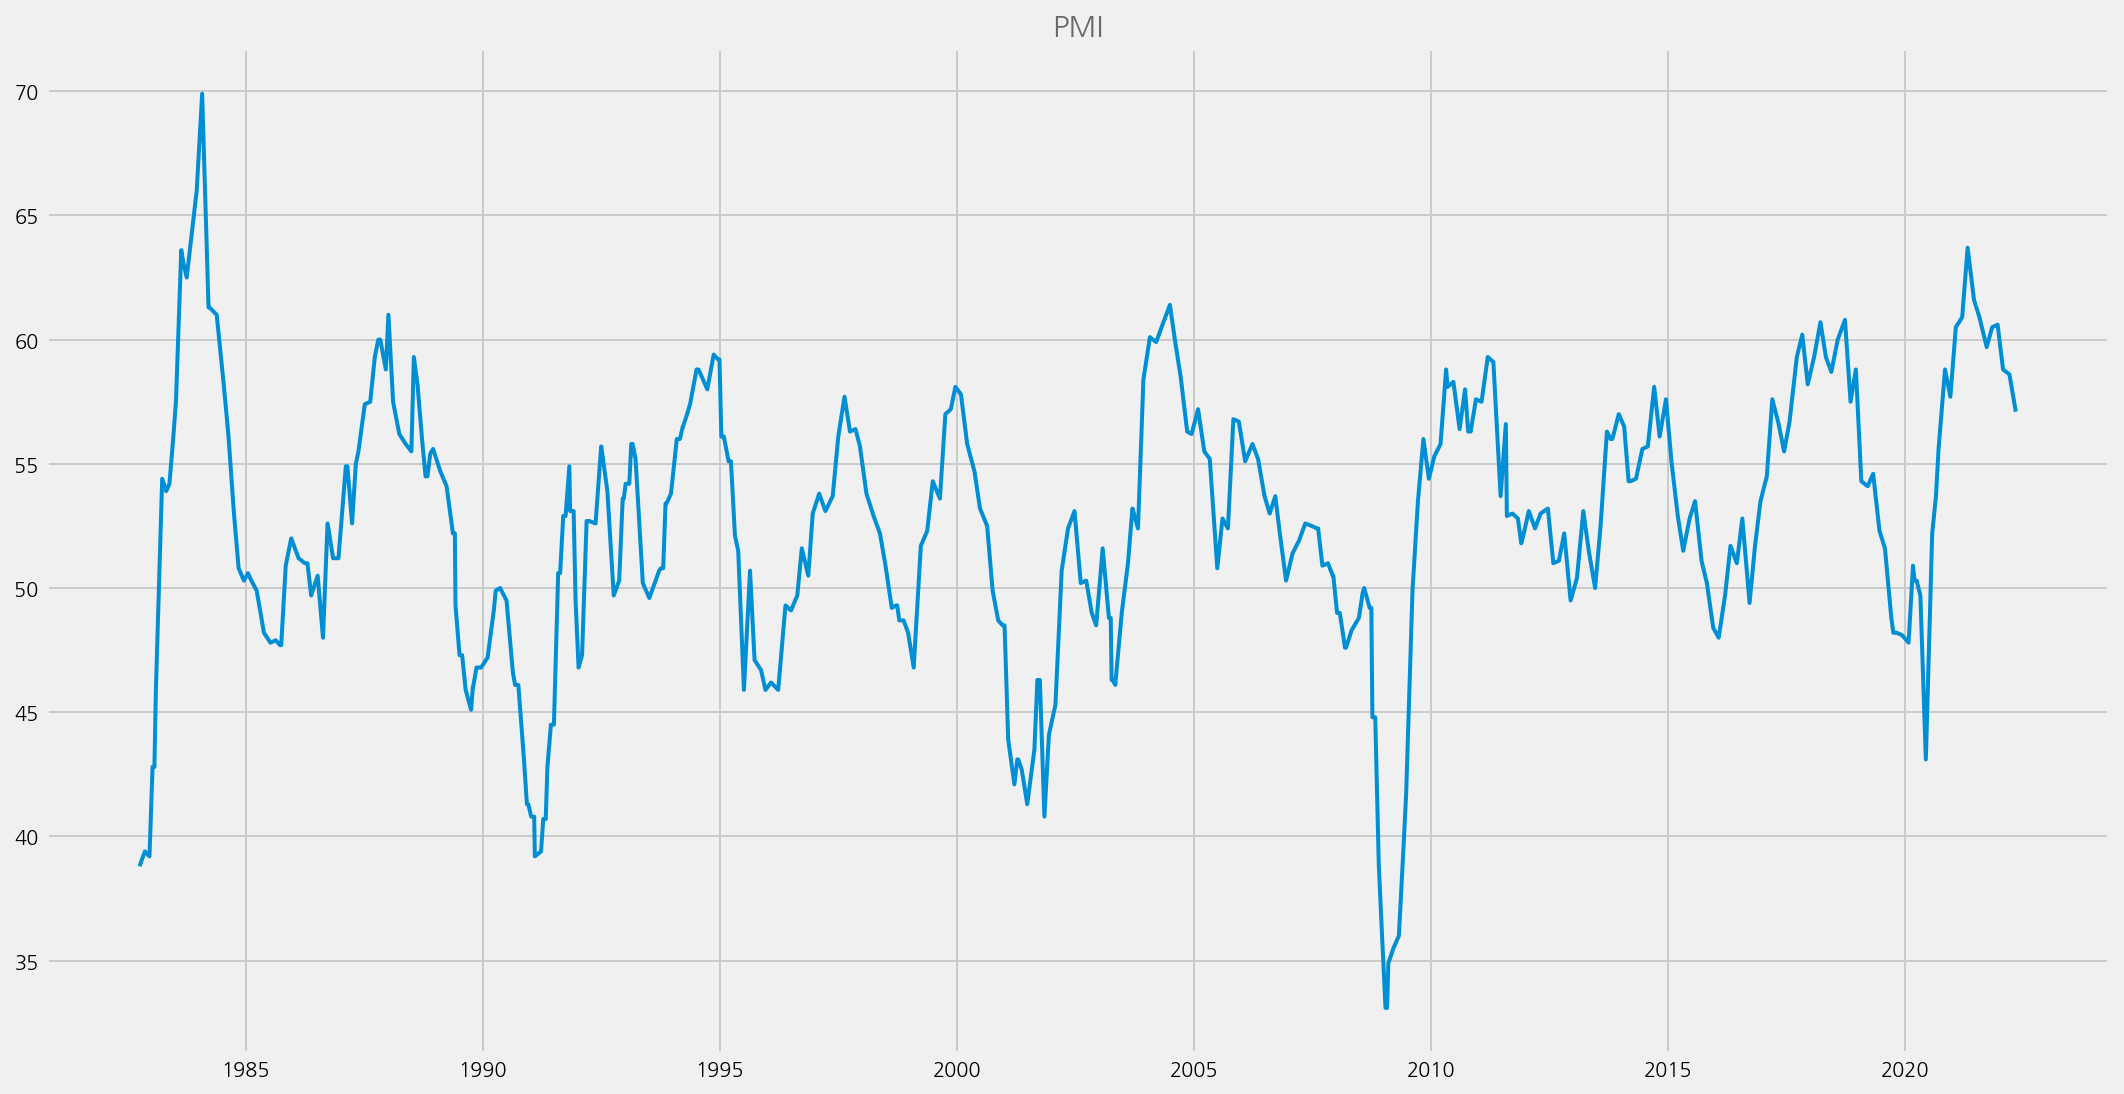

In [11]:
cfg = eKonf.compose("visualize/plot=lineplot")
cfg.plots[0].x = "date"
cfg.plots[0].y = "PMI"
cfg.figure.figsize = (15, 8)
cfg.ax.title = "PMI"
eKonf.instantiate(cfg, data=fs_fomc.data.reset_index())


In [16]:
data = fs_fomc.data.set_index('date')
data.dtypes

INFO:ekorpkit.io.file:Concatenating 2 dataframes


target               object
prev_decision       float64
GDP_diff_prev       float64
PMI                 float64
EMP_diff_prev       float64
RSALES_diff_year    float64
UNEMP_diff_prev     float64
HSALES_diff_year    float64
Inertia_diff        float64
Balanced_diff       float64
split                object
dtype: object

In [17]:
data.index

DatetimeIndex(['2002-09-24', '1997-03-25', '2011-04-27', '1989-02-08',
               '2008-09-16', '1987-10-30', '1991-07-03', '1990-09-07',
               '2019-09-18', '1991-06-10',
               ...
               '1994-08-16', '1990-03-27', '2004-12-14', '1983-10-04',
               '1985-05-21', '1995-12-19', '2020-03-19', '2010-10-15',
               '2016-06-15', '1995-04-28'],
              dtype='datetime64[ns]', name='date', length=415, freq=None)